In [2]:
!pip install yfinance

In [3]:
# Vamos a descargar tres tickers

fecha_inicial = "2020-01-01"
fecha_final = "2022-01-05"

In [4]:
import yfinance as yf
import pandas as pd

# Descargar datos de tickers
herdez = yf.download("HERDEZ.MX", fecha_inicial, fecha_final)
femsa = yf.download("FEMSAUB.MX", fecha_inicial, fecha_final)
cuervo = yf.download("CUERVO.MX", fecha_inicial, fecha_final)
ac = yf.download("AC.MX", fecha_inicial, fecha_final)
alsea = yf.download("ALSEA.MX", fecha_inicial, fecha_final)

# Calcular rendimientos diarios
returns_herdez = herdez['Adj Close'].pct_change().dropna()
returns_femsa = femsa['Adj Close'].pct_change().dropna()
returns_cuervo = cuervo['Adj Close'].pct_change().dropna()
returns_ac = ac['Adj Close'].pct_change().dropna()
returns_alsea = alsea['Adj Close'].pct_change().dropna()

# Concatenar rendimientos
returns = pd.concat([returns_herdez, returns_femsa, returns_cuervo, returns_ac, returns_alsea], axis=1)
returns.columns = ['Herdez', 'FEMSA', 'Cuervo', 'AC', 'Alsea']

# Calcular factores Fama-French (ejemplo básico, sin datos adicionales)
returns['Market'] = yf.download("^MXX", fecha_inicial, fecha_final)['Adj Close'].pct_change().dropna()  # Rendimiento del mercado mexicano

# Crear factores SMB (Small Minus Big) y HML (High Minus Low)
returns['SMB'] = returns['Herdez'] + returns['Cuervo'] - returns['AC'] - returns['Alsea']  # Factor de cartera de pequeña capitalización
returns['HML'] = returns['Herdez'] + returns['AC'] - returns['Cuervo'] - returns['Alsea']  # Factor de cartera de alto valor

# Imprimir los primeros registros de los datos
print(returns.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
              Herdez     FEMSA    Cuervo        AC     Alsea    Market  \
Date                                                                     
2020-01-03 -0.001839  0.000000 -0.001998  0.008928  0.007964  0.004222   
2020-01-06  0.000790  0.000000  0.003003 -0.003744  0.000096 -0.002903   
2020-01-07 -0.012099  0.000000 -0.004704  0.009419 -0.000482 -0.007585   
2020-01-08 -0.000266  0.000000 -0.000287 -0.003287 -0.005205  0.007091   
2020-01-09  0.003595  0.073825 -0.009026 -0.005821 -0.000872  0.002277   

                 SMB       HML  
Date                            
2

In [6]:
import matplotlib.pyplot as plt

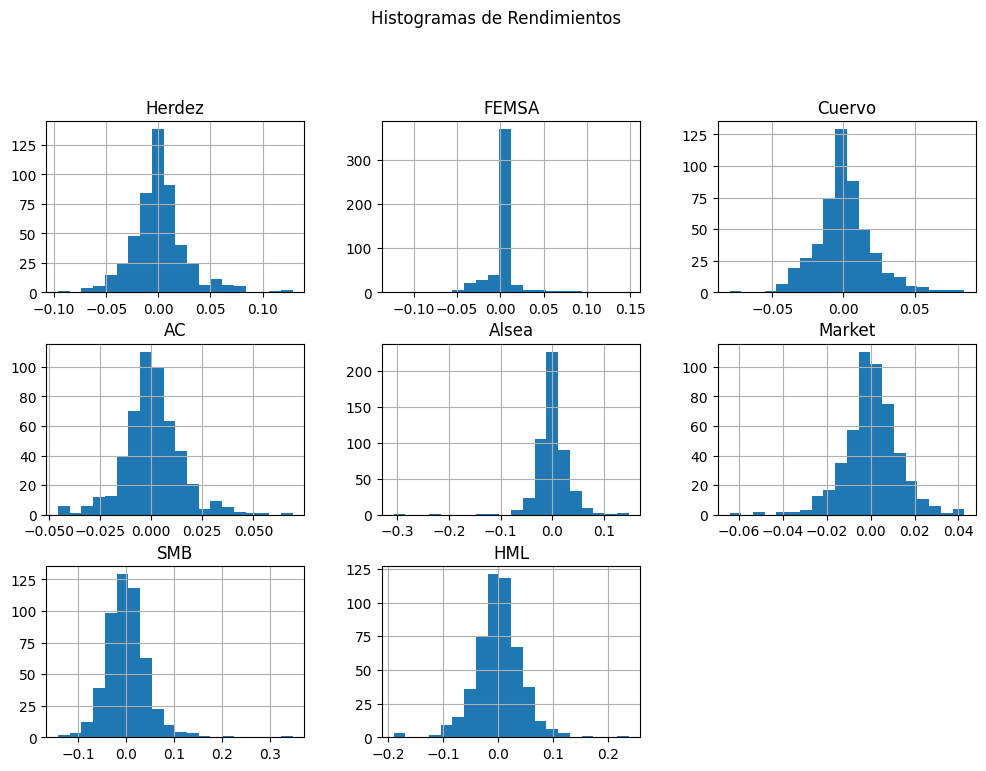

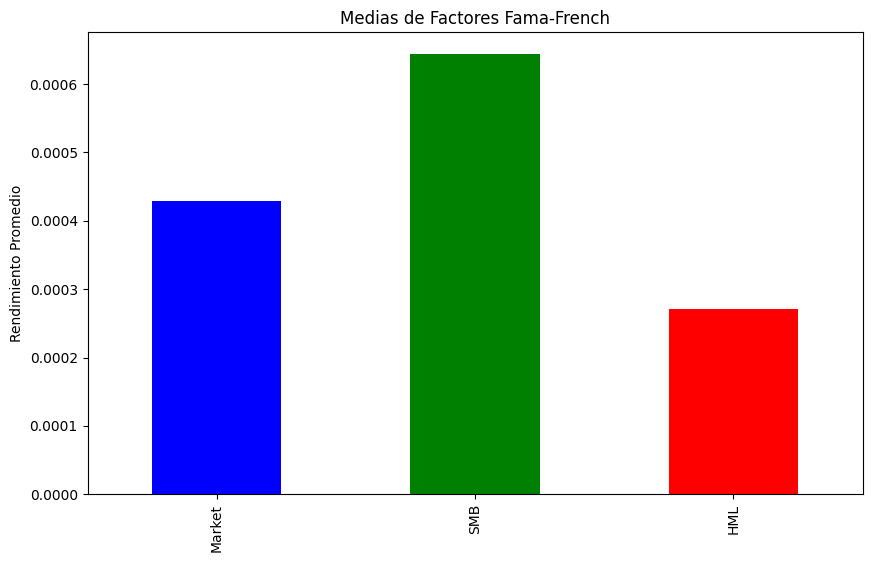

In [7]:
# Histogramas de rendimientos
returns.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogramas de Rendimientos', y=1.02)
plt.show()

# Gráfica de barras de factores Fama-French
factors_mean = returns[['Market', 'SMB', 'HML']].mean()
factors_mean.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.title('Medias de Factores Fama-French')
plt.ylabel('Rendimiento Promedio')
plt.show()